In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Dec/2025 10:57:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:57:36] "GET /static/styles_home.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:57:36] "GET /static/train_val_overview.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:57:36] "GET /static/loss_accuracy_comparison.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:57:38] "GET /review HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:57:38] "GET /static/styles_review.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:57:38] "GET /static/sentiment_plt.png HTTP/1.1" 304 -


1/1 [==============================] - 0s 32ms/step


127.0.0.1 - - [25/Dec/2025 10:57:57] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:57:58] "GET /static/styles_review.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:57:58] "GET /static/sentiment_plt.png HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:58:01] "GET /detailRV HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:58:01] "GET /static/styles_detailRV.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:58:13] "GET /reviewCSV HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:58:13] "GET /static/sentiment_plt.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:58:13] "GET /static/styles_reviewCSV.css HTTP/1.1" 304 -


1/1 [==============================] - 0s 42ms/step


127.0.0.1 - - [25/Dec/2025 10:58:30] "POST /upload HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:58:30] "GET /static/styles_reviewCSV.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:58:30] "GET /static/sentiment_plt.png HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:58:35] "GET /download_result HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:59:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:59:14] "GET /static/styles_home.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:14] "GET /static/train_val_overview.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:14] "GET /static/loss_accuracy_comparison.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:15] "GET /analysis_word HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:59:15] "GET /static/styles_analysis_word.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:15] "GET /static/wordcloud.png HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:15] "GET /static/word_occurrence.png HTTP/1.1" 304 -


Đã lưu wordcloud tại: static/wordcloud.png


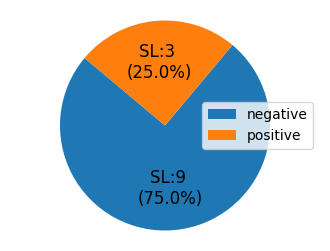

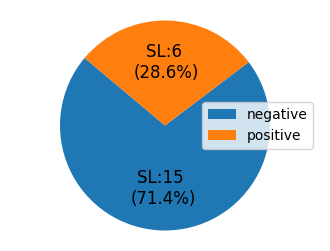

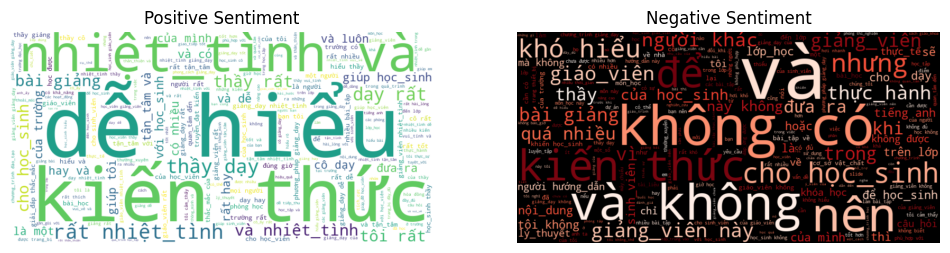

Đã lưu biểu đồ tại: static/word_occurrence.png


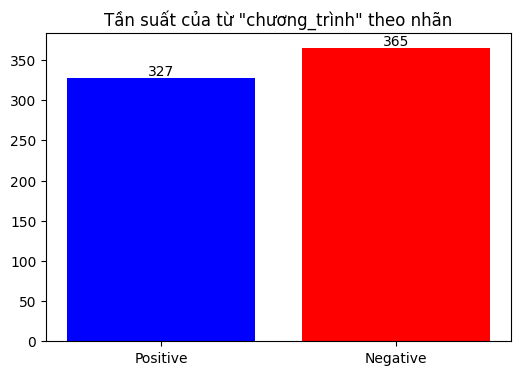

127.0.0.1 - - [25/Dec/2025 10:59:32] "POST /analysis_word HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:59:32] "GET /static/styles_analysis_word.css HTTP/1.1" 304 -
127.0.0.1 - - [25/Dec/2025 10:59:32] "GET /static/word_occurrence.png HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 10:59:32] "GET /static/wordcloud.png HTTP/1.1" 200 -


In [14]:
if __name__ == '__main__':
    app.run()

In [13]:
import os
import joblib
import pandas as pd
from pyvi import ViTokenizer
from keras.models import load_model

from utils_pre_process import pre_process_review, translate_csv
from utils_split_simple_sentences import split_sentences
from utils_predict import process_X_token_review, predict_score, predict_sentiment, plot_sentiment_pie, generate_wordcloud, plot_word_occurrences
from utils_to_csv import save_review_to_csv, save_review_csv_to_csv, save_all_reviews_to_csv, save_sup_review_to_csv, save_all_reviews_and_sup_review_to_csv

from flask import Flask, render_template, send_from_directory, request

model = load_model('model/My_Student_LSTM_model_95.18.h5')

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/review', methods=['POST', 'GET'])
def review():
    parameter = ['0']
    parameter_df = pd.DataFrame({'parameter': parameter})
    parameter_df.to_csv('input/parameter.csv', index=False)

    # Ghi nhận và đánh giá 01 review
    if request.method == 'POST':
        new_review = request.form['review']
        features = str(new_review)

        # Kiểm tra chuỗi không rỗng
        if features.strip():
            # Dự đoán cảm xúc review
            new_review = translate_csv(new_review, "vi", "en")
            new_review = translate_csv(new_review, "en", "vi")
            new_review = pre_process_review(new_review)
            token_new_review = ViTokenizer.tokenize(new_review)
            token_new_review = token_new_review.split()
            X_token_new_review = process_X_token_review(token_new_review, vt="post", tokenizer_path = "input/tokenizer.joblib")
            score = predict_score(model, X_token_new_review)
            sentiment = predict_sentiment(score)
            save_all_reviews_to_csv(new_review, sentiment, 'input/all_reviews.csv')
            
            # Gọi hàm để ghi dữ liệu vào file
            save_review_to_csv(new_review, sentiment, 'output/review')

            # Vẽ biểu đồ sentiment
            plot_sentiment_pie()
        
            review_fname = joblib.load('input/review_fname.joblib')
            save_all_reviews_and_sup_review_to_csv(new_review, sentiment, review_fname, 'output/all_sup_review.csv')

            # Loop through each review, predict sentiment, and save to CSV
            sup_reviews = split_sentences(new_review)
            sup_sentiments = []
            for sup_review in sup_reviews:
                sup_review = pre_process_review(sup_review)
                token_sup_review = ViTokenizer.tokenize(sup_review).split()
                X_token_sup_review = process_X_token_review(token_sup_review, vt="post", tokenizer_path = "input/tokenizer.joblib")
                sup_score = predict_score(model, X_token_sup_review)
                sup_sentiment = predict_sentiment(sup_score)
                sup_sentiments.append(sup_sentiment)
            save_sup_review_to_csv(sup_reviews, sup_sentiments, 'output/sup_review.csv')

            sup_review_fname = joblib.load('input/sup_review_fname.joblib')
            for sup_review, sup_sentiment in zip(sup_reviews, sup_sentiments):
                save_all_reviews_and_sup_review_to_csv(sup_review, sup_sentiment, sup_review_fname, 'output/all_sup_review.csv')
            
            # Gán cờ cho page
            parameter = ['1']
            parameter_df = pd.DataFrame({'parameter': parameter})
            parameter_df.to_csv('input/parameter.csv', index=False)

            error = 'Cảm ơn bạn đã đánh giá!'

            return render_template('review.html', error=error, result_ready=True)
        else:
            error = 'Chuỗi rỗng, vui lòng nhập lại!'
            return render_template('review.html', error=error)
    return render_template('review.html')

@app.route('/download_result_review')
def download_result_review():
    try:
        # Đọc lại tên file result gần nhất đã lưu
        review_fname = 'output/all_sup_review.csv'
        directory = os.path.dirname(review_fname)
        filename = os.path.basename(review_fname)
        return send_from_directory(directory, filename, as_attachment=True)
    except Exception as e:
        return render_template('reviewCSV.html', error=f"Lỗi tải file: {e}")

@app.route('/reviewCSV', methods=['POST', 'GET'])
def reviewCSV():
    return render_template('reviewCSV.html')

@app.route('/upload', methods=['POST'])
def upload():
    try:
        # Kiểm tra file upload
        if 'file' not in request.files:
            return render_template('reviewCSV.html', error="Không tìm thấy file tải lên!")

        file = request.files['file']
        if file.filename == '':
            return render_template('reviewCSV.html', error="Chưa chọn file CSV!")

        # Lưu file upload tạm
        filename_prefix = "uploaded_reviews"
        thu_tu = 1

        while True:
            ten_file = f"{filename_prefix}_{thu_tu}.csv"
            upload_path = os.path.join('input', ten_file)
            if not os.path.exists(upload_path):
                break
            thu_tu += 1

        file.save(upload_path)

        # Đọc file CSV
        df = pd.read_csv(upload_path, on_bad_lines='skip', engine='python')

        if 'review_org' not in df.columns:
            return render_template('reviewCSV.html', error="File CSV phải có cột 'review'!")

        # ===== Xử lý từng dòng trong file upload =====
        csv_reviews = df['review_org']
        csv_sentiments = []
        for csv_review in csv_reviews:
            csv_review = translate_csv(csv_review, "vi", "en")
            csv_review = translate_csv(csv_review, "en", "vi")
            csv_review = pre_process_review(csv_review)
            token_csv_review = ViTokenizer.tokenize(csv_review).split()
            X_token_csv_review = process_X_token_review(token_csv_review, vt="post", tokenizer_path = "input/tokenizer.joblib")
            csv_score = predict_score(model, X_token_csv_review)
            csv_sentiment = predict_sentiment(csv_score)
            csv_sentiments.append(csv_sentiment)

        # Lưu toàn bộ kết quả vào output/result_X.csv
        save_review_csv_to_csv(csv_reviews, csv_sentiments, 'output/result_CSV')

        # ===== GỘP VÀO FILE all_reviews.csv =====
        result_df = pd.DataFrame({'review_org': csv_reviews, 'sentiment': csv_sentiments})
        all_reviews_path = 'input/all_reviews.csv'

        if os.path.exists(all_reviews_path):
            existing_df = pd.read_csv(all_reviews_path)
            combined_df = pd.concat([existing_df, result_df], ignore_index=True)
        else:
            combined_df = result_df

        combined_df.to_csv(all_reviews_path, index=False)

        # ===== VẼ BIỂU ĐỒ TỪ all_reviews.csv =====
        plot_sentiment_pie()

        return render_template('reviewCSV.html', error="Phân tích file CSV hoàn tất!", result_ready=True)

    except Exception as e:
        return render_template('reviewCSV.html', error=f"Lỗi xử lý file: {e}")

@app.route('/download_result')
def download_result():
    try:
        # Đọc lại tên file result gần nhất đã lưu
        review_fname = joblib.load('input/review_fname.joblib')
        directory = os.path.dirname(review_fname)
        filename = os.path.basename(review_fname)
        return send_from_directory(directory, filename, as_attachment=True)
    except Exception as e:
        return render_template('reviewCSV.html', error=f"Lỗi tải file: {e}")
    
@app.route('/detailRV', methods=['POST', 'GET'])
def detailRV():
    try:
        parameter_df = pd.read_csv("input/parameter.csv")
        review_fname = joblib.load('input/review_fname.joblib')
        sup_review_fname = joblib.load('input/sup_review_fname.joblib')
        parameter = parameter_df['parameter'][0]
        if parameter == 1:
            df_review = pd.read_csv(review_fname)
            table_review = df_review.to_html(index=False)
            df_sup_review = pd.read_csv(sup_review_fname)
            table_sup_review = df_sup_review.to_html(index=False)
            df_all_review = pd.read_csv('input/all_reviews.csv')
            table_all_review = df_all_review.to_html(index=False)
            return render_template('detailRV.html', table_review=table_review, table_sup_review=table_sup_review, table_all_review =table_all_review )
        else:
            return render_template('review.html', error='Chuỗi rỗng, vui lòng nhập lại!')
    except Exception as e:
        return render_template('review.html', error='Chuỗi rỗng, vui lòng nhập lại!')

@app.route('/detailCSV', methods=['POST', 'GET'])
def detailCSV():
    try:
        df_all_review = pd.read_csv('input/all_reviews.csv')
        table_all_review = df_all_review.to_html(index=False)
        return render_template('detailCSV.html', table_all_review =table_all_review )
    except Exception as e:
        return render_template('reviewCSV.html', error='Chuỗi rỗng, vui lòng nhập lại!')

@app.route('/download_all_reviews')
def download_all_reviews():
    try:
        return send_from_directory('input', 'all_reviews.csv', as_attachment=True)
    except Exception as e:
        return render_template('detailRV.html', error=f"Lỗi tải file tổng hợp: {e}")
    
@app.route('/analysis_word', methods=['POST', 'GET'])
def analysis_word():
    
    # Ghi nhận và đánh giá 01 review
    if request.method == 'POST':
        new_review = request.form['analysis_word']
        features = str(new_review)

        # Kiểm tra chuỗi không rỗng
        if features.strip():
            # Dự đoán cảm xúc review
            new_review = translate_csv(new_review, "vi", "en")
            new_review = translate_csv(new_review, "en", "vi")
            new_review = pre_process_review(new_review)
            token_new_review = ViTokenizer.tokenize(new_review)
            token_new_review = "_".join(token_new_review.strip().split())

            generate_wordcloud(
                X_token='input/My_review_token.joblib',
                sentiment='input/My_sentiment.joblib',
                save_dir='static/',
                dpi=300
            )
            plot_word_occurrences(
                token_new_review,
                X_token='input/My_review_token.joblib',
                sentiment='input/My_sentiment.joblib',
                save_dir='static/',   # thư mục lưu ảnh
                dpi=300                     # chất lượng ảnh
            )
            error = 'Cảm ơn bạn đã đánh giá!'
            return render_template('analysis_word.html', error=error)
        else:
            error = 'Chuỗi rỗng, vui lòng nhập lại!'
            return render_template('analysis_word.html', error=error)
    return render_template('analysis_word.html')


In [2]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Dec/2025 15:59:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2025 15:59:12] "GET /static/styles_home.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:12] "GET /static/2.png HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:12] "GET /static/1.png HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2025 15:59:16] "GET /static/styles_home.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:16] "GET /static/1.png HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:16] "GET /static/2.png HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:18] "GET /review HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2025 15:59:18] "GET /static/styles_review.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Dec/2025 15:59:18] "GET /static/sentiment_plt.png HTTP/1.1" 304 -
[2025-12-24 15:59:34,653] ERROR in app: Exception on /review [POST]
Traceback (most recent call last):
  File "c:\Users\VoHa\AppData\Loca